In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
cd /content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project

/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project


In [28]:
# cd /content/drive/MyDrive/Project_Folder

/content/drive/.shortcut-targets-by-id/1nnDlHh2vTCslIz2vPfEy3GRrNLo3bZS4/Project_Folder


### tesseract 설치

In [6]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 24 not upgraded.
Need to get 4,850 kB of archives.
After this operation, 16.3 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1 [1,598 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 tesseract-ocr amd64 4.1.1-2build2 [262 kB]
Fetched 4,850 kB in 1s (6,133 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/Fro

In [7]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
%pwd

'/content/drive/MyDrive/dcx_mid_project/DCX_Mid_Project'

### img read

In [8]:
import pytesseract
import cv2
import os
from PIL import Image
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import requests
from imutils.perspective import four_point_transform
import imutils

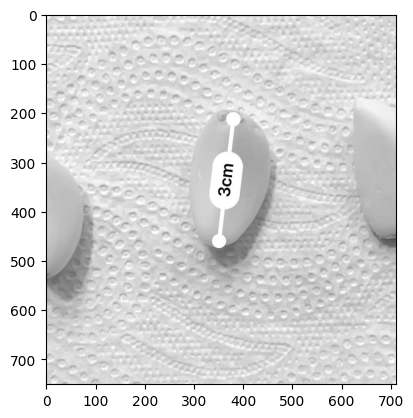

In [9]:
#imread
image_org = cv2.imread('length/3cm/garlic_3cm_1.jpg')
gray = cv2.cvtColor(image_org, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

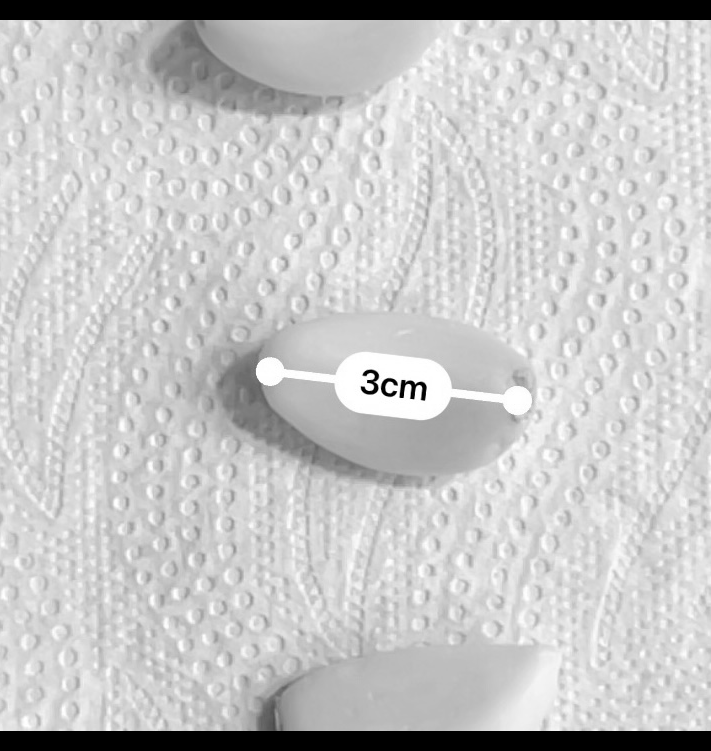

3cm
A



In [10]:
#image rotation
(h,w) = gray.shape[:2]
center = (w//2, h//2)

M = cv2.getRotationMatrix2D(center, -90, 1.0)
rotated = cv2.warpAffine(gray, M, (w,h))
cv2_imshow(rotated)

options = "--psm 4"
text = pytesseract.image_to_string(rotated, config=options)

print(text)

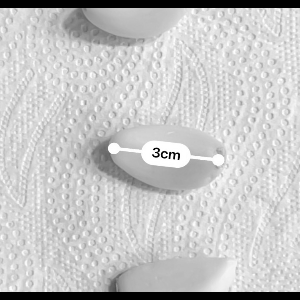

NameError: ignored

In [18]:
image = rotated.copy()

image = cv2.resize(image,(300,300))

#Gaussian blurred
gaus_ing = cv2.GaussianBlur(image, (5,5),0.3)
cv2_imshow(gaus_ing)

#laplacian and sobel
lap = cv2.Laplacian(gaus_ing, cv2,CV_64F)
lap = np.unit8(np.absolute(lap))
cv2.imshow("Laplacian",lap)

tesseract_2
https://yunwoong.tistory.com/72?category=902345

In [ ]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

In [ ]:
org_image = cv2.imread('length/3cm/garlic_3cm_1.jpg')
plt_imshow("orignal image", org_image)

In [ ]:
image = org_image.copy()
image = imutils.resize(image, width=500)
ratio = org_image.shape[1] / float(image.shape[1])
 
# 이미지를 grayscale로 변환하고 blur를 적용
# 모서리를 찾기위한 이미지 연산
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5,), 0)
edged = cv2.Canny(blurred, 75, 200)
 
plt_imshow(['gray', 'blurred', 'edged'], [gray, blurred, edged])

In [ ]:
# contours를 찾아 크기순으로 정렬
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
 
receiptCnt = None
 
# 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
for c in cnts:
	peri = cv2.arcLength(c, True)
	approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
	# contours가 크기순으로 정렬되어 있기때문에 제일 첫번째 사각형을 영수증 영역으로 판단하고 break
	if len(approx) == 4:
		receiptCnt = approx
		break
 
 
# 만약 추출한 윤곽이 없을 경우 오류
if receiptCnt is None:
	raise Exception(("Could not find receipt outline."))
    
output = image.copy()
cv2.drawContours(output, [receiptCnt], -1, (0, 255, 0), 2)
plt_imshow("Receipt Outline", output)

In [ ]:
image_can = cv2.imread('length/3cm/garlic_3cm_1.jpg', cv2.IMREAD_COLOR)

#color -> grayscale
def gray_scale(image):
    result = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return result

#grayscale -> binary
def image_threshold(image):
    result = cv2.threshold(image,0,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) [1]
    return result
#delation
def dilation(image):
    kernel = np.ones((5,5), np.uint8)
    result = cv2.dilate(image, kernel, iterations=1)
    return result

#erosion -> dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    result = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)
    return result



image_can_gray = gray_scale(image_can)
image_can_binary = image_threshold(image_can_gray)
image_can_open = opening(image_can_binary)
image_car_dilate = dilation(image_can_binary)

# plt.figure(figsize=[20,7])
# plt.subplot(1,2,1)
# plt.imshow(image_car_dilate)
# plt.xlabel("Original binary", fontsize=15)
# print("image_can shape: ", image_can_binary.shape)

# plt.subplot(1,2,2)
# plt.imshow(image_can_open)
# plt.xlabel("opening", fontsize=15)
# print("opening image shape: ", image_can_open.shape)
# plt.savefig('opening2.png')

options = "--psm 4"
text = pytesseract.image_to_string(image_can_open, config=options)

print(text)
# cv2_imshow(image_can_open)